### Carregar arquivo gerado no dia anterior

In [21]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Guarnieri\Desktop\Hashtag_Python\7_days_of_code\data\Base_consolidada.csv")
display(df.head())

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


## Quantidade de Exemplares emprestados

In [ ]:
df['ano'] = pd.to_datetime(df['data_emprestimo']).dt.year

In [ ]:
exemplares_emprestados_ano = df.groupby('ano')['id_exemplar'].nunique().reset_index()
exemplares_emprestados_ano.columns = ['Ano', 'Quantidade de Exemplares']
display(exemplares_emprestados_ano)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(exemplares_emprestados_ano['Ano'], exemplares_emprestados_ano['Quantidade de Exemplares'], color='mediumseagreen')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Exemplares Únicos Emprestados')
plt.title('Empréstimos Únicos por Ano')
plt.xticks(exemplares_emprestados_ano['Ano']) 
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.2, str(altura), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
#Meses
df['Mes']= pd.to_datetime(df['data_emprestimo']).dt.month

In [ ]:
#Quantidade de Exemplares
exemplares_emprestados_mes = df.groupby('Mes')['id_exemplar'].nunique().reset_index()
exemplares_emprestados_mes.columns = ['Mes', 'Quantidade de Exemplares']
display(exemplares_emprestados_mes)

In [ ]:
#Quantidade de Emprestimos
exemplares_emprestados_mes = df.groupby('Mes')['id_exemplar'].count().reset_index()
exemplares_emprestados_mes.columns = ['Mes', 'Quantidade de Exemplares']
display(exemplares_emprestados_mes)

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(exemplares_emprestados_mes['Mes'], exemplares_emprestados_mes['Quantidade de Exemplares'], color='blue', marker='o')
plt.xlabel('Mes')
plt.ylabel('Quantidade de Exemplares Únicos Emprestados por Mês')
plt.title('Empréstimos Únicos por Mês')
plt.xticks(exemplares_emprestados_mes['Mes']) 
plt.tight_layout()
plt.show()

In [ ]:
#Maior hora do dia
df['Hora'] = pd.to_datetime(df['data_emprestimo']).dt.hour

In [40]:
#Quantidade de Emprestimos por hora
exemplares_emprestados_hora = df.groupby('Hora')['id_exemplar'].count().reset_index()
exemplares_emprestados_hora.columns = ['Hora', 'Quantidade de Exemplares']
display(exemplares_emprestados_hora)

,Hora,Quantidade de Exemplares
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


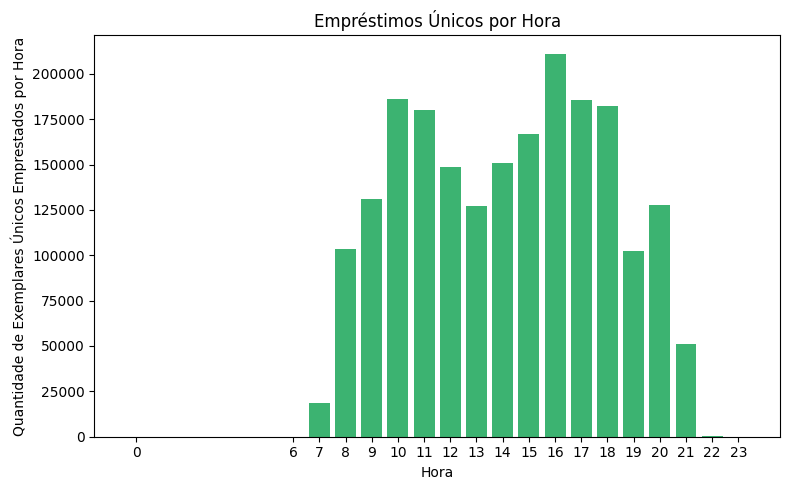

In [41]:
plt.figure(figsize=(8, 5))
bars = plt.bar(exemplares_emprestados_hora['Hora'], exemplares_emprestados_hora['Quantidade de Exemplares'], color='mediumseagreen')
plt.xlabel('Hora')
plt.ylabel('Quantidade de Exemplares Únicos Emprestados por Hora')
plt.title('Empréstimos Únicos por Hora')
plt.xticks(exemplares_emprestados_hora['Hora']) 
plt.tight_layout()
plt.show()